# Project: **Multivariate Root Solving** in **YRoots package by tylerjarvis**

## Group members
* Matthew Lehmann - Contributions: Writing the introduction, writing the test cases for 'breaking' the program, writing conclusions and open questions
* Reilly Richards - Contributions: Writing the introduction, writing method section, writing conclusions and open questions
* Siyu Yao - Contributions: Chose this topic for individual project, explained the concepts of the package to the team, aided in conclusions and open questions writing
* Erik Rhodes


## Introduction

The purpose of this project is to take a deeper look at the YRoots package (tylerjarvis) and its effectiveness at finding common zeros within a multivariate system of equations. When considering this package, its important to recognize that the YRoots pacakage is looking for $x, y, z$, etc. values where both of the unique multiple variable functions equal 0. A lot of these types of packages are generally applied in machine learning, optimization, and data analyst environments and are, in general, a much broader and more practical use of 'root finding'. As compared to applying things like Newton's method on single, one variable functions. In this project however, we will try to push the YRoots function to its limits based on the assumptions it uses and its performance for different functions. 

Essentially, the goal will be to break the program and show its limitations to hopefully give the reader a better understanding of the real purpose of this package. In 'breaking' the package, we should aid in showing where these principles can and cannot be used. The first example will use two multivariable functions f and g: 
\begin{equation}
f(x,y) = \sin(xy) + x\ln(y+3) - x^{2} + \frac{1}{y-4}
\end{equation}
\begin{equation}
g(x,y) = \cos(3xy) + e^{\frac{3y}{x-2}} - x - 6
\end{equation}

The way YRoots operates requires a general knowledge of the area in which the roots exist. Sort of similar to Newton's method from class,  This is going to be an assumption that will be pushed to the limit later in the project to see how limiting it is on the software. But for now, it is known that these two functions share values on the interval 

\begin{equation}
    -1 \leq X \leq 0
\end{equation}
\begin{equation}
    -2 \leq Y \leq 1
\end{equation}

In order to download the YRoots package, clone the repository at 'git clone https://github.com/tylerjarvis/RootFinding.git' then 'pip install -e ./RootFinding' so that you have the appropriate python package. Simply import the yroots package within your python script and you will have access to the package. Let's take a look at this first example.


Percent Finished: 100%                                                  
Total intervals checked was 85
Methods used were ['constant_term_check', 'quadratic_check', 'Base Case', 'Macaulay', 'Too Deep']
The percent solved by each was [ 8.2353 83.5294  0.      8.2353  0.    ]


<Figure size 3600x2400 with 0 Axes>

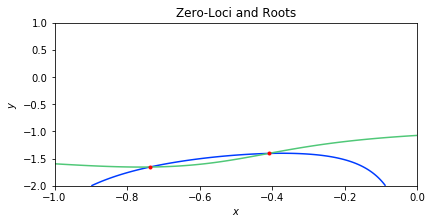

CPU times: user 1.57 s, sys: 98 ms, total: 1.67 s
Wall time: 7.2 s
[[-0.410034   -1.40471685]
 [-0.73720226 -1.65461673]]


In [1]:
#imports
import numpy as np
import yroots as yr

#plotting tools
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#define the functions
f = lambda x,y : np.sin(x*y) + x*np.log(y+3) - x**2 + 1/(y-4)
g = lambda x,y : np.cos(3*x*y) + np.exp(3*y/(x-2)) - x - 6

#search domain bounds
a = [-1,-2] #lower bounds on x and y
b = [0,1] #upper bounds on x and y


# compute the roots and time the process
%time roots = yr.solve([f,g], a, b, plot=True)

print(roots)

So when we look at this plot, it's interesting to note that the values of the $f(x,y)$ and $g(x,y)$ functions are not shown. Rather, the lines appear to represent the program searching for the common roots. Which would really be an incredibly interesting look root finding algorithms being used underneath the hood of the program. 

Now let's check the accuracy of the root finding algorithm in this example before we move on to the methods section. Again, the purpose of this example was to find x and y values that result in the two multivariable functions equaling 0. The first root is at $x = -0.410034$ and $y = -1.40471685$ as reported in the printed section above. The other root is located at $x = -0.73720226$ and $y = -1.65461673$. 


\begin{equation}
    f(-0.410034,-1.40471685) = \sin(0.5759816689) - 0.1915068898 - 0.1681278812 - 0.1850235688 
\end{equation}
   
\begin{equation}
    \therefore f(-0.410034,-1.40471685) = -2.3E-9
\end{equation}

\begin{equation}
    g(-0.410034,-1.40471685) = \cos(-1.727945007) + 5.746468647 + 0.410034 - 6 
\end{equation}

\begin{equation}
    \therefore g(-0.410034,-1.40471685) = -1.51033E-8
\end{equation}

\begin{equation}
    f(-0.73720226,-1.65461673) = \sin(1.219787193) - 0.2187123788 - 0.5434671721 - 0.1768466454 
\end{equation}

\begin{equation}
    \therefore f(-0.73720226,-1.65461673) = 8.53487E-9
\end{equation}

\begin{equation}
    g(-0.73720226,-1.65461673) = -0.8689255959 + 6.131723374 + 0.73720226 - 6
\end{equation}

\begin{equation}
    \therefore g(-0.73720226,-1.65461673) = 3.82591E-8
\end{equation}

Therefore, we can see that the value of both of the functions at each set of x and y values is 0 to a decent approximation. Hopefully this also helps illustrate the true purpose of the YRoots package, and this example should help make it clear how exactly the package can be used. So now, the question is, where exactly do these kinds of multivariate functions really come into place? Well the answer is that there are plenty of methods that could use this sort of package. Most of them are computer science and physics related and will now be discussed in the following section. 

## Methods
So where does this sort of tool come in handy? That is to say, where exactly is it useful to solve for common roots between systems of multivariate equations? Well, the answer includes, machine learning, general robotics (kinematics, motion planning, collision detection, etc), computer vision, and more. An interesting example of where the roots of a multivariate system of equations comes into play is from this paper: http://web.cs.iastate.edu/~cs577/handouts/polysystem.pdf by Yan-Bin Jia. Consider the lever arm construction pictured here

<img src='images/lever.png' align='center'>

With a coordinate system setup at the first joint, we can see that the position of the 'hand' of the entire fulcrum is dependent on the orientation angles $\theta_{1}$ and $\theta_{2}$. Therefore, we can determine the location of the end effector using the an equation of the form

<img src='images/eq.png' align='center'>

Where the functions $x$ and $y$ are both dependent on $\theta_{1}$ and $\theta_{2}$. It's a pretty simple example showing where a method like YRoots can prove to be useful, but it should do point out how simple it is to come up with situations that depend on a multivariate system of equations. These sorts of equations come up quite often in fields like machine learning, with the concept of reward functions that try to teach AI how to act, and in physics based examples like this one.

One obvious question that you may now have is, can this YRoots package be applied to more than two equations then? The answer, so far as we can tell from the implementations we've ran with the program, is no. Which is kind of unfortunate considering the fact that it's now easy to envision a scenario where more than 2 equations are needed to describe a system (like a lot of aircraft dynamics problems which require up to 15 equations at a time). But in the context of YRoots, we will stick to using only two equations and finding the common zeros of two equations at a time. 

From this point forward, we will now go into pushing the YRoots, and thus maybe our computers, a little harder than the first example. Hopefully we can break the program or illustrate an ill-conditioned example where the software package starts to lose accuracy, lack in performance, or just fail altogether. Based on the assumptions we've already discussed with the intervals used in the examples above. One way to hinder the program's performance should be clear.
## Results and interpretation

## Conclusions and open questions